## Setup

In [1]:
import sys
sys.path.append('../')
del sys
%reload_ext autoreload
%autoreload 2

from modeling.pipeline import Pipeline
from modeling.nn import RegressionMLP, ClassificationMLP
import torch

## Data pipeline parameters

In [2]:
batch_size = 64
drop_last = False
test_proportion = 0.2
valid_proportion = 0.2
use_k_fold = False
k_k_fold = None

## Load the data

In [3]:
pipeline = Pipeline(use_k_fold=use_k_fold)
pipeline.process_data(batch_size=batch_size,
                      drop_last=drop_last,
                      test_proportion=test_proportion,
                      valid_proportion=valid_proportion,
                      k=k_k_fold)

Processing the modeling task...
Computing the annotated queries...
Initial length of queries: 0
Object loaded from ../results/../results/task_annotation/v2_0/task/queries_size10k_shuffle_articles1_queries1_seed0.pkl
Object loaded from ../results/../results/task_annotation/v2_1/task/queries_sizemax_shuffle_articles1_queries1_seed0.pkl
Object loaded from ../results/../results/task_annotation/v2_2/task/queries_sizemax_shuffle_articles1_queries1_seed0.pkl
Final length of queries: 61056
Done (elapsed time: 1s).

Computing the annotations...
Initial length of annotations: 0
Object loaded from ../results/task_annotation/v2_0/results/batch_00_complete.csv
   Correcting "n this article, Nevada and Ohio are discussed. The two American states..." to " The two American states..."
   Correcting "In this article, California and Oregon are discussed. The two neighboring states..." to " The two neighboring states..."
   Correcting "In this article, California and Oregon are discussed. The two West Coa

## Metrics

In [4]:
scores_names = [
    'average_precision', 
    'precision_at_k', 
    'recall_at_k', 
    'reciprocal_best_rank', 
    'reciprocal_average_rank', 
    'ndcg'
]
n_updates = 200

## Half BOW

In [ ]:
input_dim, hidden_dim1, hidden_dim2 = 4305, 1000, None

dropout = 0.1
lr = 4e-7
step_size = 1
gamma = 0.5
n_epochs = 10

is_regression = False

if is_regression:
    loss = torch.nn.MSELoss()
    net = RegressionMLP(input_dim=input_dim, hidden_dim1=hidden_dim1, hidden_dim2=hidden_dim2, dropout=dropout)
    
else:
    weight = torch.tensor([1, 1], dtype=torch.float)
    loss = torch.nn.CrossEntropyLoss(weight=weight)
    net = ClassificationMLP(input_dim=input_dim, hidden_dim1=hidden_dim1, hidden_dim2=hidden_dim2, dropout=dropout)
    
optimizer = torch.optim.Adam(net.parameters(), lr=lr)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=step_size, gamma=gamma)

In [ ]:
from modeling.models import HalfBOWModel

model = HalfBOWModel(vocab_frequency_range=[100, 10000],
                     net=net,
                     optimizer=optimizer,
                     lr_scheduler=lr_scheduler,
                     loss=loss,
                     scores_names=scores_names)

pipeline.preview_data(model=model)

In [ ]:
pipeline.train_model(model=model, 
                     n_epochs=n_epochs, 
                     n_updates=n_updates,
                     is_regression=is_regression)

In [8]:
model.final_plot(align_experiments=True,
                 display_training_scores=False, 
                 scores_names=[
                     'average_precision', 
                     'precision_at_k', 
                     'recall_at_k', 
                     'reciprocal_best_rank', 
                     'reciprocal_average_rank', 
                     'ndcg'
                 ])

IndexError: list index out of range

In [9]:
model.display_metrics()

average_precision: training set 0.07662 validation set 0.06004
precision_at_k: training set 0.01800 validation set 0.01533
recall_at_k: training set 0.16235 validation set 0.06222
reciprocal_best_rank: training set 0.07996 validation set 0.12909
reciprocal_average_rank: training set 0.07125 validation set 0.01829
ndcg: training set nan validation set 0.06832


In [10]:
pipeline.explain_model(model=model, 
                       display_explanations=True,
                       n_samples=5,
                       n_answers=10,
                       scores_names=[
                           'average_precision', 
                           'precision_at_k', 
                           'recall_at_k', 
                           'reciprocal_best_rank', 
                           'reciprocal_average_rank', 
                           'ndcg'
                       ])


Entities (location): Camden,  Pinelands
Scores of the batch: average_precision: 0.00967, precision_at_k: 0.00000, recall_at_k: 0.00000, reciprocal_best_rank: 0.01053, reciprocal_average_rank: 0.00465, ndcg: 0.00000


ValueError: only one element tensors can be converted to Python scalars

## Full BOW

In [8]:
input_dim, hidden_dim1, hidden_dim2 = 5710, 1000, None

dropout = 0.1
lr = 1e-6
step_size = 1
gamma = 0.5
n_epochs = 10

is_regression = False

if is_regression:
    loss = torch.nn.MSELoss()
    net = RegressionMLP(input_dim=input_dim, hidden_dim1=hidden_dim1, hidden_dim2=hidden_dim2, dropout=dropout)
    
else:
    weight = torch.tensor([1, 1], dtype=torch.float)
    loss = torch.nn.CrossEntropyLoss(weight=weight)
    net = ClassificationMLP(input_dim=input_dim, hidden_dim1=hidden_dim1, hidden_dim2=hidden_dim2, dropout=dropout)
    
optimizer = torch.optim.Adam(net.parameters(), lr=lr)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=step_size, gamma=gamma)

In [ ]:
from modeling.models import FullBOWModel

model = FullBOWModel(vocab_frequency_range=[50, 1000],
                     net=net,
                     optimizer=optimizer,
                     lr_scheduler=lr_scheduler,
                     loss=loss,
                     scores_names=scores_names)

pipeline.preview_data(model=model)

In [ ]:
pipeline.train_model(model=model, 
                     n_epochs=n_epochs, 
                     n_updates=n_updates,
                     is_regression=is_regression)

In [ ]:
model.final_plot(align_experiments=True,
                 display_training_scores=False, 
                 scores_names=[
                     'average_precision', 
                     'precision_at_k', 
                     'recall_at_k', 
                     'reciprocal_best_rank', 
                     'reciprocal_average_rank', 
                     'ndcg'
                 ])

In [ ]:
model.display_metrics()

In [ ]:
pipeline.explain_model(model=model, 
                       display_explanations=True,
                       n_samples=5,
                       n_answers=10,
                       scores_names=[
                           'average_precision', 
                           'precision_at_k', 
                           'recall_at_k', 
                           'reciprocal_best_rank', 
                           'reciprocal_average_rank', 
                           'ndcg'
                       ])

## Embedding

In [5]:
input_dim, hidden_dim1, hidden_dim2 = 600, 1000, None

dropout = 0.1
lr = 4e-7
step_size = 1
gamma = 0.5
n_epochs = 10

is_regression = False

if is_regression:
    loss = torch.nn.MSELoss()
    net = RegressionMLP(input_dim=input_dim, hidden_dim1=hidden_dim1, hidden_dim2=hidden_dim2, dropout=dropout)
    
else:
    weight = torch.tensor([1, 1], dtype=torch.float)
    loss = torch.nn.CrossEntropyLoss(weight=weight)
    net = ClassificationMLP(input_dim=input_dim, hidden_dim1=hidden_dim1, hidden_dim2=hidden_dim2, dropout=dropout)
    
optimizer = torch.optim.Adam(net.parameters(), lr=lr)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=step_size, gamma=gamma)

In [6]:
from modeling.models import EmbeddingModel

model = EmbeddingModel(net=net,
                       optimizer=optimizer,
                       lr_scheduler=lr_scheduler,
                       loss=loss,
                       scores_names=scores_names)

pipeline.preview_data(model=model)

Initializing the Word2Vec pretrained embedding...
Input dimension: 600


Training of the model...



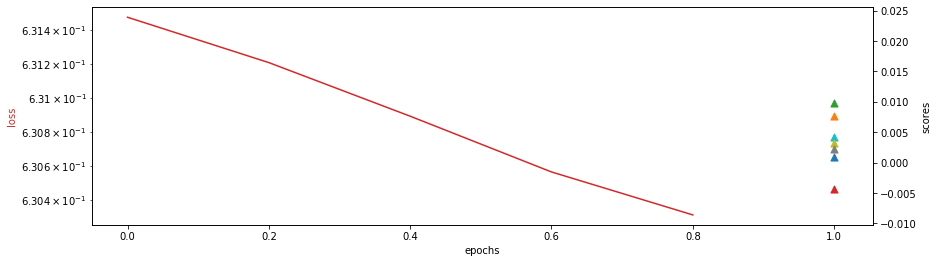

Epoch 1/10: Validation Loss: 0.63046 Validation Score: 0.00766
Learning rate decreasing to 1.25e-08
--------------------------------------------------------------


Keyboard interruption, exiting and saving all results except current epoch...


In [11]:
pipeline.train_model(model=model, 
                     n_epochs=n_epochs, 
                     n_updates=n_updates,
                     is_regression=is_regression)

In [12]:
model.final_plot(align_experiments=True,
                 display_training_scores=False, 
                 scores_names=[
                     'average_precision', 
                     'precision_at_k', 
                     'recall_at_k', 
                     'reciprocal_best_rank', 
                     'reciprocal_average_rank', 
                     'ndcg'
                 ])

In [27]:
model.display_metrics()

2.5e-07

In [ ]:
pipeline.explain_model(model=model, 
                       display_explanations=True,
                       n_samples=5,
                       n_answers=10,
                       scores_names=[
                           'average_precision', 
                           'precision_at_k', 
                           'recall_at_k', 
                           'reciprocal_best_rank', 
                           'reciprocal_average_rank', 
                           'ndcg'
                       ])